# Gradient Descent

In this class we will code one of the oldest (and most efficient!) optimization methods (Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées).

**The intuition**: go in the direction of steepest descent

<img style="margin-left:0" width="300px" src="https://upload.wikimedia.org/wikipedia/commons/f/ff/Gradient_descent.svg" />

**More formally**:

We want to minimize a function $f: \mathbb{R}^p \to \mathbb{R}$ which is differentiable. Then we construct a sequence $x^1, x^2 , \ldots$ by the recusive formula

$$x^{k+1} = x^k - \gamma \nabla f(x^k) \quad$$

where $\gamma$ is the step-size. 

## Step size

* How to choose the step size?

The theory says that the optimum is given by $\frac{1}{L}$, where $L$ is the Lipschitz constant of the gradient of $f$.

## Gradient descent for least squares

We will now code a gradient descent scheme. The first thing is to define what is the loss that we want to optimize. We will start with a least squares loss:

$$f(x) = \frac{1}{2}\|b - Ax\|^2$$
for some given matrices $A$ and vector $b$.

In [17]:
import numpy as np

n_samples, n_features = 10, 5
A = np.random.randn(n_samples, n_features)
b = np.random.randn(n_samples)

def func(x):
    return 0.5 * np.sum((b - np.dot(A, x)) ** 2)

In [18]:
func([0, 1, 2, 3, 4])

163.61159304000088

In [19]:
# Implement algorithm:
# 1. compute the gradient
# 2. decide step-size
# 3. perform update

max_iter = 100
# Lipschitz constant
L = np.linalg.norm(A.T.dot(A))
step_size = 1. / L
# initial guess
xk = np.zeros(n_features)
for i in range(max_iter):
    grad = - A.T.dot(b - np.dot(A, xk))
    xk = xk - step_size * grad

## Visualize convergence

Once we started the algorithm. How to know if its working properly?

In [22]:
# imports matplotlib, a plotting library
%pylab inline

obj_vals = []
xk = np.zeros(n_features)
for i in range(max_iter):
    grad = - A.T.dot(b - np.dot(A, xk))
    xk = xk - step_size * grad
    obj_vals.append(func(xk)) # .. insert this line to keep track of iterates ..

Populating the interactive namespace from numpy and matplotlib


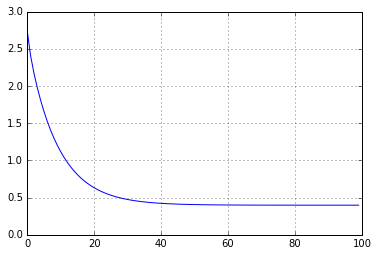

In [25]:
plt.plot(obj_vals)
plt.grid()
plt.show()